# Tottenham Hotspur Premier League Player Recruitment
## Matias Stanham

<b>1- Determine the exponent in the Pythagorean Wins Formula that results in the lowest prediction error for games in recent history (you can decide how many years to include, last 10 years, but include all premier league games in that time frame). Are we (Tottenham Hotspur FC) performing better or worse than expected?</b>

After doing a little digging, I found two research papers/posts which looked at using Pythagorean Wins formula in soccer.
One was done by Howard Hamilton [here](https://hhamilton.typepad.com/files/pythag_mit_sa_2010.pdf) and uses a slightly more advanced compared to the one used in Baseball. The other, was performed by [Michael Bertin of stats bomb](https://statsbomb.com/2016/04/improving-soccers-version-of-the-bill-james-pythagorean/) and will be used for this assignment.
The equation for soccer looks as follows:

*$predicted points$* = ((*$goalsFor^{C}$*)/(*$goalsFor^{C}$*+*$goalsAgainst^{C}$*))

I also extracted the all Premier League table results from the 2010/11 season through the 2019/20 season, in addition to pulling the 20/21 season results as of Febrary 8th, 2021. This data and all the other data I used for this assignment was extracted from [FBRef, a part of Sports Reference's Website](https://fbref.com/en/comps/9/Premier-League-Stats) and available [here in this google sheet](https://docs.google.com/spreadsheets/d/1BEkxMnZASQljcefGldS2ZACvwkVagxElLhI4JwrYWFI/edit?usp=sharing).  

In [2]:
import pandas as pd
import numpy as np
import math as m
import matplotlib as ptl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

path = os.getcwd()

print(path)

C:\Users\stanma02\Desktop\2021\school


In [51]:
df = pd.read_csv("10yrsEPL.csv")

In this dataset, Yr represents the season. Rk is the position in the table the team finished in. Squad gives us the name of the team. MP is matches played. W, D, L correspond to Wins, Draws, and Losses repectively. GF, GA, and GDiff stand for Goals for, goals against, and goal differential. Last, Pts stands for the current point total of each season. 3 points are awarded for each win, 1 point for draws, and 0 for losses.

In [54]:
df.drop(['Link'],axis=1,inplace=True)
df

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
0,20/21,1,Manchester City,22,15,5,2,43,14,29,50
1,20/21,2,Manchester Utd,23,13,6,4,49,30,19,45
2,20/21,3,Leicester City,23,13,4,6,39,25,14,43
3,20/21,4,Liverpool,23,11,7,5,44,29,15,40
4,20/21,5,Chelsea,23,11,6,6,38,24,14,39
...,...,...,...,...,...,...,...,...,...,...,...
215,11/10,16,Wigan Athletic,38,9,15,14,40,61,-21,42
216,11/10,17,Wolves,38,11,7,20,46,66,-20,40
217,11/10,18,Birmingham City,38,8,15,15,37,58,-21,39
218,11/10,19,Blackpool,38,10,9,19,55,78,-23,39


In [8]:
FilterData = df['Yr'] != '20/21'
HistoricalData= df[FilterData]
HistoricalData

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
20,19/20,1,Liverpool,38,32,3,3,85,33,52,99
21,19/20,2,Manchester City,38,26,3,9,102,35,67,81
22,19/20,3,Manchester Utd,38,18,12,8,66,36,30,66
23,19/20,4,Chelsea,38,20,6,12,69,54,15,66
24,19/20,5,Leicester City,38,18,8,12,67,41,26,62
...,...,...,...,...,...,...,...,...,...,...,...
215,11/10,16,Wigan Athletic,38,9,15,14,40,61,-21,42
216,11/10,17,Wolves,38,11,7,20,46,66,-20,40
217,11/10,18,Birmingham City,38,8,15,15,37,58,-21,39
218,11/10,19,Blackpool,38,10,9,19,55,78,-23,39


In [9]:
HistoricalData['Pythagorean_%']=(HistoricalData['GF']**1.12)/(HistoricalData['GF']**1.12+HistoricalData['GA']**1.12)
HistoricalData['AvailablePoints']=HistoricalData['MP']*3
HistoricalData['PredictedPoints']=HistoricalData['Pythagorean_%']*HistoricalData['AvailablePoints']
HistoricalData['AdjustedPoints']=round(HistoricalData['PredictedPoints'])
HistoricalData['Difference']=HistoricalData['Pts']-HistoricalData['PredictedPoints']
HistoricalData

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Pythagorean_%,AvailablePoints,PredictedPoints,AdjustedPoints,Difference
20,19/20,1,Liverpool,38,32,3,3,85,33,52,99,0.742630,114,84.659771,85.0,14.340229
21,19/20,2,Manchester City,38,26,3,9,102,35,67,81,0.768165,114,87.570832,88.0,-6.570832
22,19/20,3,Manchester Utd,38,18,12,8,66,36,30,66,0.663487,114,75.637508,76.0,-9.637508
23,19/20,4,Chelsea,38,20,6,12,69,54,15,66,0.568206,114,64.775533,65.0,1.224467
24,19/20,5,Leicester City,38,18,8,12,67,41,26,62,0.634148,114,72.292913,72.0,-10.292913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,11/10,16,Wigan Athletic,38,9,15,14,40,61,-21,42,0.383993,114,43.775209,44.0,-1.775209
216,11/10,17,Wolves,38,11,7,20,46,66,-20,40,0.400271,114,45.630925,46.0,-5.630925
217,11/10,18,Birmingham City,38,8,15,15,37,58,-21,39,0.376726,114,42.946764,43.0,-3.946764
218,11/10,19,Blackpool,38,10,9,19,55,78,-23,39,0.403404,114,45.988081,46.0,-6.988081


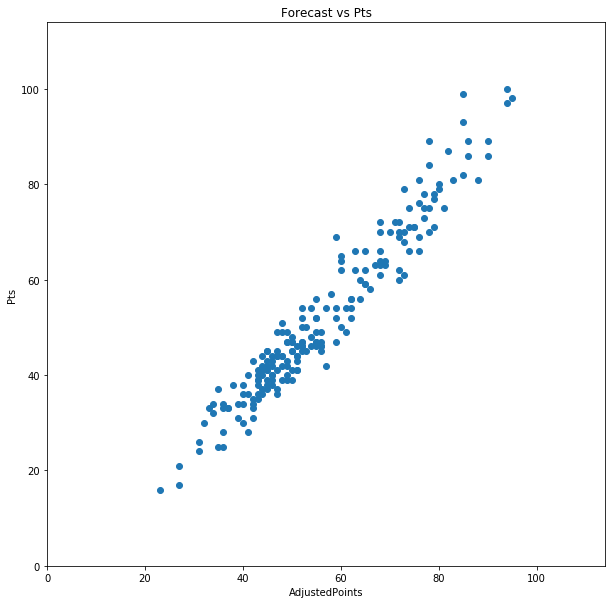

In [10]:
## regular plot with no scaling
plt.figure(figsize=(10,10))
plt.scatter(HistoricalData['AdjustedPoints'], HistoricalData['Pts'])
plt.xlim(0, 114)
plt.ylim(0, 114)
plt.ylabel('Pts')
plt.xlabel('AdjustedPoints')
plt.title('Forecast vs Pts')
plt.show()

In [11]:
from math import sqrt
import sklearn as sk ##Scikit learn
from sklearn.metrics import mean_squared_error

In [24]:
rms = sqrt(mean_squared_error(HistoricalData['Pts'], HistoricalData['AdjustedPoints'], squared=False))
rms

2.4847816033151187

In [13]:
import scipy
from scipy.optimize import minimize

In [25]:
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    return sqrt(mean_squared_error(HistoricalData['Pts'], 
                                   round((HistoricalData['GF']**x1)/(HistoricalData['GF']**x2+HistoricalData['GA']**x3)
                                         *HistoricalData['AvailablePoints']), squared=False))

In [44]:
x0= [1.2,1.2,1.2]
print(objective(x0))

2.4471048135770457


In [68]:
sol=minimize(objective, x0, method='nelder-mead')
sol

 final_simplex: (array([[1.19776223, 1.19058357, 1.24361511],
       [1.19777406, 1.19059592, 1.24362651],
       [1.19777563, 1.19059154, 1.24363104],
       [1.19776637, 1.19057984, 1.24363419]]), array([2.07936805, 2.07936805, 2.07936805, 2.07936805]))
           fun: 2.0793680534781935
       message: 'Optimization terminated successfully.'
          nfev: 100
           nit: 51
        status: 0
       success: True
             x: array([1.19776223, 1.19058357, 1.24361511])

In [69]:
sol.x

array([1.19776223, 1.19058357, 1.24361511])

In [70]:
sol.fun

2.0793680534781935

In [71]:
CurrentYear = df['Yr'] == '20/21'
CurrentSeason=df[CurrentYear]
CurrentSeason

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
0,20/21,1,Manchester City,22,15,5,2,43,14,29,50
1,20/21,2,Manchester Utd,23,13,6,4,49,30,19,45
2,20/21,3,Leicester City,23,13,4,6,39,25,14,43
3,20/21,4,Liverpool,23,11,7,5,44,29,15,40
4,20/21,5,Chelsea,23,11,6,6,38,24,14,39
5,20/21,6,West Ham,23,11,6,6,34,28,6,39
6,20/21,7,Everton,21,11,4,6,34,28,6,37
7,20/21,8,Tottenham,22,10,6,6,36,22,14,36
8,20/21,9,Aston Villa,21,11,2,8,36,24,12,35
9,20/21,10,Leeds United,22,10,2,10,38,38,0,32


In [72]:
CurrentSeason['Pythagorean_%']=(CurrentSeason['GF']**sol.x[0])/((CurrentSeason['GF']**sol.x[1])+(CurrentSeason['GA']**sol.x[2]))
CurrentSeason['AvailablePoints']=CurrentSeason['MP']*3
CurrentSeason['PredictedPoints']=CurrentSeason['Pythagorean_%']*CurrentSeason['AvailablePoints']
CurrentSeason['AdjustedPoints']=round(CurrentSeason['PredictedPoints'])
CurrentSeason['Difference']=CurrentSeason['Pts']-CurrentSeason['PredictedPoints']
CurrentSeason

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Pythagorean_%,AvailablePoints,PredictedPoints,AdjustedPoints,Difference
0,20/21,1,Manchester City,22,15,5,2,43,14,29,50,0.788836,66,52.063143,52.0,-2.063143
1,20/21,2,Manchester Utd,23,13,6,4,49,30,19,45,0.616578,69,42.543849,43.0,2.456151
2,20/21,3,Leicester City,23,13,4,6,39,25,14,43,0.604423,69,41.705162,42.0,1.294838
3,20/21,4,Liverpool,23,11,7,5,44,29,15,40,0.594720,69,41.035681,41.0,-1.035681
4,20/21,5,Chelsea,23,11,6,6,38,24,14,39,0.609232,69,42.037023,42.0,-3.037023
5,20/21,6,West Ham,23,11,6,6,34,28,6,39,0.526776,69,36.347552,36.0,2.652448
6,20/21,7,Everton,21,11,4,6,34,28,6,37,0.526776,63,33.186895,33.0,3.813105
7,20/21,8,Tottenham,22,10,6,6,36,22,14,36,0.619801,66,40.906877,41.0,-4.906877
8,20/21,9,Aston Villa,21,11,2,8,36,24,12,35,0.592970,63,37.357134,37.0,-2.357134
9,20/21,10,Leeds United,22,10,2,10,38,38,0,32,0.463879,66,30.615999,31.0,1.384001


In [75]:
TottenhamData=df['Squad']=='Tottenham'
Tottenham=df[TottenhamData]
Tottenham

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
7,20/21,8,Tottenham,22,10,6,6,36,22,14,36
25,19/20,6,Tottenham,38,16,11,11,61,47,14,59
43,18/19,4,Tottenham,38,23,2,13,67,39,28,71
62,17/18,3,Tottenham,38,23,8,7,74,36,38,77
81,16/17,2,Tottenham,38,26,8,4,86,26,60,86
102,15/16,3,Tottenham,38,19,13,6,69,35,34,70
124,14/15,5,Tottenham,38,19,7,12,58,53,5,64
145,13/14,6,Tottenham,38,21,6,11,55,51,4,69
164,13/12,5,Tottenham,38,21,9,8,66,46,20,72
183,12/11,4,Tottenham,38,20,9,9,66,41,25,69


In [76]:
Tottenham['Pythagorean_%']=(Tottenham['GF']**sol.x[0])/((Tottenham['GF']**sol.x[1])+(Tottenham['GA']**sol.x[2]))
Tottenham['AvailablePoints']=Tottenham['MP']*3
Tottenham['PredictedPoints']=Tottenham['Pythagorean_%']*Tottenham['AvailablePoints']
Tottenham['AdjustedPoints']=round(Tottenham['PredictedPoints'])
Tottenham['Difference']=Tottenham['Pts']-Tottenham['PredictedPoints']
Tottenham

,Yr,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Pythagorean_%,AvailablePoints,PredictedPoints,AdjustedPoints,Difference
7,20/21,8,Tottenham,22,10,6,6,36,22,14,36,0.619801,66,40.906877,41.0,-4.906877
25,19/20,6,Tottenham,38,16,11,11,61,47,14,59,0.542304,114,61.822679,62.0,-2.822679
43,18/19,4,Tottenham,38,23,2,13,67,39,28,71,0.629346,114,71.745471,72.0,-0.745471
62,17/18,3,Tottenham,38,23,8,7,74,36,38,77,0.681760,114,77.720618,78.0,-0.720618
81,16/17,2,Tottenham,38,26,8,4,86,26,60,86,0.802817,114,91.521084,92.0,-5.521084
102,15/16,3,Tottenham,38,19,13,6,69,35,34,70,0.670185,114,76.401135,76.0,-6.401135
124,14/15,5,Tottenham,38,19,7,12,58,53,5,64,0.488245,114,55.659875,56.0,8.340125
145,13/14,6,Tottenham,38,21,6,11,55,51,4,69,0.484110,114,55.188500,55.0,13.811500
164,13/12,5,Tottenham,38,21,9,8,66,46,20,72,0.573443,114,65.372487,65.0,6.627513
183,12/11,4,Tottenham,38,20,9,9,66,41,25,69,0.609488,114,69.481635,69.0,-0.481635


<b> 2-Pick the three players with the most(minutes) this season and determine where they rank at their position compared to the rest of the league. Pick 4 metrics to discuss with at least one coming from seasonal data, one coming from per game data and one coming from minute by minute data. (event data)</b>

In [125]:
df1 = pd.read_csv("TotGoals.csv")
df1.drop(['Link'],axis=1,inplace=True)
df1

,Player,Position,Matches,Minutes,Goals,Assists,Shots,ShotsonTarget,ShotCreationAction,GoalCreationAction
0,Pierre-Hojbjerg,MF,22,1980,1,3,9,4,34,5
1,Hugo-Lloris,GK,22,1980,0,0,0,0,1,1
2,Son-Heung-min,FW,22,1882,13,6,43,25,62,9
3,Harry-Kane,FW,20,1744,13,11,72,26,66,18
4,Eric-Dier,DF,19,1710,0,0,10,2,8,0
5,Tanguy-Ndombele,MF,18,1294,3,1,13,6,32,7
6,Moussa-Sissoko,MF,14,1329,0,0,2,1,15,1
7,Toby-Alderweireld,DF,14,1250,1,0,6,2,11,3
8,Serge-Aurier,DF,13,1075,2,1,9,5,19,1
9,Ben-Davies,DF,12,1132,0,1,2,0,16,4


Based on Minutes played, Pierre Hojbjerg, Hugo Lloris, and Son Hueng Min are the players we will Analyze starting with Hojbjerg.

For each player, I have pulled all players in their respective position, currently in the English Premier League.
For Hojbjerg, we picked all players who have played in the "Midfielder" position in any form. Note some players play multiple rolesin addition to midfield, and are identified in the Pos column below

In [121]:
df2 = pd.read_csv("Midfield.csv")
df2.drop(['Links'],axis=1,inplace=True)
df2

,Player,Pos,Squad,Age,MatchesPlayed,Minutes Played,Goals,PassAttempts,PassCmpPer,Assist,TacklesAttempted,TacklesWon,Blocks,Interceptions
0,Thiago-Alcantara,MF,Liverpool,29,10,747,0,748,88.8,0,20,15,9,13
1,Ezgjan-Alioski,DFMF,Leeds United,28,20,1351,2,979,82.7,0,44,21,25,14
2,Allan,MF,Everton,30,12,1028,0,538,86.8,0,36,24,23,7
3,Dele-Alli,MFFW,Tottenham,24,4,77,0,42,78.6,0,2,1,0,1
4,Miguel-Almiron,MFFW,Newcastle Utd,27,21,1370,4,528,80.7,1,35,20,23,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Andriy-Yarmolenko,FWMF,West Ham,31,14,357,0,139,79.1,1,5,3,7,3
196,Okay-Yokuslu,MF,West Brom,26,1,13,0,7,85.7,0,3,1,0,0
197,Andre-Frank-Zambo-Anguissa,MF,Fulham,25,22,1685,0,949,85.5,3,59,34,33,41
198,Hakim-Ziyech,FWMF,Chelsea,27,11,630,1,470,74.9,3,3,2,8,8


The 4 metrics we will pick to judge Pierre are as follows:

-Seasonal Pass Completion Percentage<br>
-(Goals+Assists) Per Match<br>
-Interceptions Per Match<br>
-(Tackles Won + Blocks + Interceptions) Per Minute

In [122]:
df2['PassCmpPerRank'] = df2.PassCmpPer.rank(pct=True)
df2['GAperMatch']=(df2['Goals']+df2['Assist'])/df2['MatchesPlayed']
df2['GAperMatchRank'] = df2.GAperMatch.rank(pct=True)
df2['IntperMatch']=df2['Interceptions']/df2['MatchesPlayed']
df2['IntperMatchRank'] = df2.IntperMatch.rank(pct=True)
df2['TBIperMin']=(df2['TacklesWon']+df2['Blocks']+df2['Interceptions'])/df2['Minutes Played']
df2['TBIperMinRank'] = df2.TBIperMin.rank(pct=True)

In [136]:
Pierre = df2['Player'] == 'Pierre-Hojbjerg'
PierreHojbjerg=df2[Pierre]
PierreHojbjerg[['PassCmpPer','PassCmpPerRank','GAperMatch','GAperMatchRank',
                'IntperMatch','IntperMatchRank','TBIperMin','TBIperMinRank']]

,PassCmpPer,PassCmpPerRank,GAperMatch,GAperMatchRank,IntperMatch,IntperMatchRank,TBIperMin,TBIperMinRank
75,88.5,0.895,0.181818,0.705,0.909091,0.765,0.052525,0.775


Based on this, we can say Pierre is an excellent Midfielder. He is in the 90th percentile for his pass completion percentage,  71st percentile when it comes to his goals and assists per match, 77th percentile in Interceptions per match, and 78th percentile in the TacklesWon + Blocks + Interceptions category.

Next up, Hugo Lloris.

Hugo is a goalkeeper, and so we'll rank him using different metrics:

-Seasonal Cross Stop Percentage (AKA when the ball is crossed into his box, how often can he stop the cross from reaching an opposing player)<br>
-Clean Sheets Per Match(AKA matches wehere conceeded no goals)<br>
-Seasonal Saves per shots on Target against<br>
-GoalsAllowed Per Minute

In [126]:
df3 = pd.read_csv("Goalkeeping.csv")
df3.drop(['Links'],axis=1,inplace=True)
df3

,Player,Squad,Age,MP,Min,Games,GoalsAllowed,ShotsonTargetAgainst,Saves,CleanSheets,OppAttemptCross,CrossStop,CrossStopPer
0,Adrian,Liverpool,34,2,180,2.0,9,16,7,0,18,2,11.1
1,Runar Alex Runarsson,Arsenal,25,1,16,0.2,0,2,2,0,4,0,0.0
2,Alisson,Liverpool,28,19,1710,19.0,19,54,38,5,109,9,8.3
3,Alphonse Areola,Fulham,27,21,1890,21.0,28,100,76,5,209,25,12.0
4,Kepa Arrizabalaga,Chelsea,26,3,270,3.0,6,14,8,0,27,4,14.8
5,David Button,West Brom,31,1,90,1.0,2,7,5,0,10,1,10.0
6,Willy Caballero,Chelsea,39,1,90,1.0,3,3,0,0,8,0,0.0
7,Kiko Casilla,Leeds United,34,1,90,1.0,1,2,1,0,8,2,25.0
8,Karl Darlow,Newcastle Utd,30,23,2070,23.0,38,109,74,4,225,21,9.3
9,Ederson,Manchester City,27,21,1890,21.0,13,41,33,13,110,7,6.4


In [117]:
df3['CrossStop%Rank'] = df3.CrossStopPer.rank(pct=True)
df3['CleanSheetsPerMatch']=df3['CleanSheets']/df3['MP']
df3['CleanSheetsPerMatchRank'] = df3.CleanSheetsPerMatch.rank(pct=True)
df3['SavePercent']=df3['Saves']/df3['MP']
df3['SavePercentRank'] = df3.SavePercent.rank(pct=True)
df3['GoalsAllowedPerMin']=df3['GoalsAllowed']/df3['Min']
df3['GoalsAllowedPerMinRank'] = df3.SavePercent.rank(pct=True)

In [120]:
Hugo = df3['Player'] == 'Hugo Lloris'
HugoLloris=df3[Hugo]
HugoLloris[['CrossStopPer','CrossStop%Rank','CleanSheetsPerMatch','CleanSheetsPerMatchRank',
            'SavePercent','SavePercentRank','GoalsAllowedPerMin','GoalsAllowedPerMinRank']]

,CrossStopPer,CrossStop%Rank,CleanSheetsPerMatch,CleanSheetsPerMatchRank,SavePercent,SavePercentRank,GoalsAllowedPerMin,GoalsAllowedPerMinRank
18,3.9,0.277778,0.318182,0.625,3.045455,0.666667,0.011111,0.666667


Hugo is an ok goalkeeper. While he has a poor 28th percentile in Cross Stop Percentage, he has a fair clean sheets per match percentile of 63%, and a 67th percentile in Saves per shots on target, and Goals allowed per minute.

In [137]:
df4 = pd.read_csv("Forward.csv")
df4.drop(['Link'],axis=1,inplace=True)
df4

,Player,Pos,Squad,Age,MatchesPlayed,Minutes,Goals,Ast,ShotsAttempted,ShotsonTargetPer,GoalsgivenShotsonTarget,GoalCreatingActions
0,Tammy-Abraham,FW,Chelsea,23,18,957,6,1,30,43.3,0.46,2
1,Che-Adams,FW,Southampton,24,21,1713,4,4,37,45.9,0.24,6
2,Sergio-Aguero,FW,Manchester City,32,5,143,0,0,4,25.0,0.00,0
3,Marc-Albrighton,FWDF,Leicester City,31,17,1041,0,2,14,42.9,0.00,6
4,Dele-Alli,MFFW,Tottenham,24,4,77,0,0,2,50.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
158,Chris-Wood,FW,Burnley,29,20,1679,4,0,31,58.1,0.22,2
159,Andriy-Yarmolenko,FWMF,West Ham,31,14,357,0,1,7,28.6,0.00,2
160,Wilfried-Zaha,FW,Crystal Palace,28,19,1667,9,2,43,32.6,0.50,9
161,Andi-Zeqiri,FWDF,Brighton,21,3,68,0,0,5,0.0,NaN,1


Last, we have out star forward Son heung-min. We'll rank him using different metrics too:

-Goals given Shots on Target<br>
-Goals+Assists Per Match<br>
-Goal Creating Actions Per Match<br>
-ShotsAttempted Per Minute

In [138]:
df4['GoalsgivenShotsonTargetrank'] = df4.GoalsgivenShotsonTarget.rank(pct=True)
df4['GAperMatch']=(df4['Goals']+df4['Ast'])/df4['MatchesPlayed']
df4['GAperMatchRank'] = df4.GAperMatch.rank(pct=True)
df4['GCAperMatch']=df4['GoalCreatingActions']/df4['MatchesPlayed']
df4['GCAperMatchRank'] = df4.GCAperMatch.rank(pct=True)
df4['ShotsAttemptedPerMin']=df4['ShotsAttempted']/df4['Minutes']
df4['ShotsAttemptedPerMinRank'] = df4.ShotsAttemptedPerMin.rank(pct=True)

In [139]:
Son = df4['Player'] == 'Son-Heung-min'
SonHuengMin=df4[Son]
SonHuengMin[['GoalsgivenShotsonTarget','GoalsgivenShotsonTargetrank','GAperMatch','GAperMatchRank',
             'GCAperMatch','GCAperMatchRank','ShotsAttemptedPerMin','ShotsAttemptedPerMinRank']]

,GoalsgivenShotsonTarget,GoalsgivenShotsonTargetrank,GAperMatch,GAperMatchRank,GCAperMatch,GCAperMatchRank,ShotsAttemptedPerMin,ShotsAttemptedPerMinRank
54,0.52,0.953125,0.863636,0.984663,0.409091,0.861963,0.022848,0.509202


Son is in the 95th percentile among forwards in Goals given shots on target, 98th percentile in Goals and Assists per match, 86th percentile in Goal creation actions per math, and 51st percentile in shots attempted per minute. Son is an incredible striker: while he does not get many shots per minute, when he does shoot, hes very likely to find the net.


<b>3-From here we are trying to determine the impact of adding a new player. Based on the findings in (2) pick a player to replace in our current lineup with another player from the same position group. Determine the additional Goals we could expect based on seasonal data and possibly through simulation.</b>

I have repurposed the technique used in chapter 3 of Mathletics, and hope to create a multivariate regression model for goals using the following equation:

*$Goals = Shots*w0 + Shots on Target*w1 + ShotCreationAction*w2 + GoalCreationAction*w3 + Assits*w4$*

where w0 through w4 are all weights.

Below we have all 22 of Tottenhams players used this season with these stats.

In [140]:
df5 = pd.read_csv("TotGoals.csv")
df5.drop(['Matches','Minutes','Link'],axis=1,inplace=True)
df5

,Player,Position,Goals,Assists,Shots,ShotsonTarget,ShotCreationAction,GoalCreationAction
0,Pierre-Hojbjerg,MF,1,3,9,4,34,5
1,Hugo-Lloris,GK,0,0,0,0,1,1
2,Son-Heung-min,FW,13,6,43,25,62,9
3,Harry-Kane,FW,13,11,72,26,66,18
4,Eric-Dier,DF,0,0,10,2,8,0
5,Tanguy-Ndombele,MF,3,1,13,6,32,7
6,Moussa-Sissoko,MF,0,0,2,1,15,1
7,Toby-Alderweireld,DF,1,0,6,2,11,3
8,Serge-Aurier,DF,2,1,9,5,19,1
9,Ben-Davies,DF,0,1,2,0,16,4


In [141]:
from sklearn import linear_model

X=df5[['Shots','ShotsonTarget','ShotCreationAction','GoalCreationAction']]
Y=df5['Goals']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print(regr.coef_)

[-0.04123888  0.59932716 -0.01246282  0.0848796 ]


Now that we have our equation, we perform player replacement. While our answers from part 2 suggests we replace Hugo Lloris, he is a goalkeeper and is expected to have a low impact on goals scored anyway. For this example, we will play with the idea that Pierre Hojbjerg is leaving next summer due to his exceptional season and needs replacement. This is due mostly to the wide variability in types of midfielders out there, and while Pierre is phenomenal defensively, if we want to increase goals, we may want to consider a more offensive midfielder.

Below I have pulled all the current midfielders in the premier league who are not currently in Tottenham's squad. I will plug the regression coefficients from our model into this data and rank players based on who provides the highest expected goals. We will also remove players from Machester United, Arsenal, Liverpool, Manchester City, and Chelsea. These teams are rivals and will likely not let us purchase one of thier players.

In [157]:
df6 = pd.read_csv("NonTotGoals.csv")
df6.drop(['MP','Minutes','Link'],axis=1,inplace=True)

In [158]:
Final=df6[~df6['Squad'].isin(['Manchester Utd', 'Manchester City', 'Chelsea', 'Liverpool','Arsenal'])]
Final

,Player,Pos,Squad,Goals,Assists,Shots,ShotsonTarget,ShotCreationAction,GoalCreationAction
9,Ross-Barkley,MF,Aston Villa,3,1,29,8,50,4
10,Jack-Grealish,FWMF,Aston Villa,6,10,45,16,134,20
11,Conor-Hourihane,MF,Aston Villa,1,1,5,2,8,1
12,Douglas-Luiz,MF,Aston Villa,0,2,18,6,32,4
13,John-McGinn,MF,Aston Villa,1,4,21,5,53,9
...,...,...,...,...,...,...,...,...,...
186,Pedro-Neto,FWMF,Wolves,4,4,42,15,85,6
187,Ruben-Neves,MF,Wolves,3,0,40,10,37,1
188,Owen-Otasowie,MF,Wolves,0,1,2,0,6,1
189,Daniel-Podence,FWMF,Wolves,3,2,25,13,48,7


In [159]:
Final['TotExpGoals']=Final['Shots']*regr.coef_[0]+Final['ShotsonTarget']*regr.coef_[1]+Final['ShotCreationAction']*regr.coef_[2]+Final['GoalCreationAction']
Final['TotExpGoalsRank'] = Final.TotExpGoals.rank(pct=True)

In [160]:
Final.sort_values(by=['TotExpGoalsRank'], ascending=False)

,Player,Pos,Squad,Goals,Assists,Shots,ShotsonTarget,ShotCreationAction,GoalCreationAction,TotExpGoals,TotExpGoalsRank
10,Jack-Grealish,FWMF,Aston Villa,6,10,45,16,134,20,26.063467,1.000000
65,James-Rodriguez,FWMF,Everton,5,3,26,14,50,11,17.695228,0.993421
90,James-Maddison,MFFW,Leicester City,6,5,47,15,75,11,17.116969,0.986842
88,Harvey-Barnes,FWMF,Leicester City,7,3,48,21,54,6,15.933412,0.980263
80,Jack-Harrison,MF,Leeds United,6,4,32,11,66,10,14.450409,0.973684
...,...,...,...,...,...,...,...,...,...,...,...
141,Ibrahima-Diallo,MF,Southampton,0,0,2,0,6,0,-0.157255,0.032895
37,Dale-Stephens,MF,Burnley,0,0,4,0,2,0,-0.189881,0.026316
18,Bernardo,DFMF,Brighton,0,0,4,0,4,0,-0.214807,0.019737
69,Neeskens-Kebano,FWMF,Fulham,0,0,6,0,3,0,-0.284822,0.013158


Based on the algorithm and criteria we selected, Jack Grealish should be the primary candidate with either James Rodriguez or James Maddison coming in as the replacement for Pierre Hojbjerg if the goal is to increase Tottenham's goal output.  

<b>4-Describe what additional inputs or adjustments that you could make to help our department in the future. For instance, if we were facing a particular Goalkeeper/Striker, what would you like to account for in your simulation that would provide a more accurate prediction? </b>

While Sports Reference gave us a plethora of data at the Minute, Match, and Seasonal level, all of the metrics provided are considered "On the ball data", ie data collected where a player is interacting with the ball. The majority of the game for every player; however, they do not have the ball. If possible, I would like to incorporate off the ball data into my forecasts. This would help give a wider picture of the actions a player performs on the field.

Additionally, I would like data on player movement/heat map to be able to idenfity better replacements given expected player positioning. 